In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from jupyterthemes import jtplot
plt.style.use('mike') 
jtplot.style(context='notebook', fscale=1, grid=False)

import cosmogrb

You do not have threeML installed


# GRBs

This section describes how to handle the low level simulation of GRBs. AS the code currently is built for simulating GRBs as observed by Fermi-GBM, we will focus our attention there. As the code expands, I will update the docs. 

![alt text](https://upload.wikimedia.org/wikipedia/commons/1/1f/Fermi_telescope_illustration_01.jpg)


## Instantiate the GRB with its parameters

For this example, we will create a GRB that has its flux coming from a single pulse shape that is described by a cutoff power law evolving in time. 

$$  F_{h\nu}(t)  = K(t) \left(\frac{\nu}{\nu_0(t)} \right)^{-\alpha} \cdot \exp\left(- \frac{\nu}{\nu_0(t)} \right)$$



In [3]:
grb = cosmogrb.GBMGRB_CPL(
    ra=312.0,
    dec=-62.0,
    z=1.0,
    peak_flux=5e-7,
    alpha=-0.66,
    ep=500.0,
    tau=2.0,
    trise=1.0,
    tdecay=1.,
    duration=80.0,
    T0=0.1,
)

2020-03-11 15:23:50 he-lt19060.mpe.mpg.de astropy[20695] WARNING AstropyDeprecationWarning: "clobber" was deprecated in version 2.0 and will be removed in a future version. Use argument "overwrite" instead.


## Examine the latent lightcurve

<IPython.core.display.Javascript object>


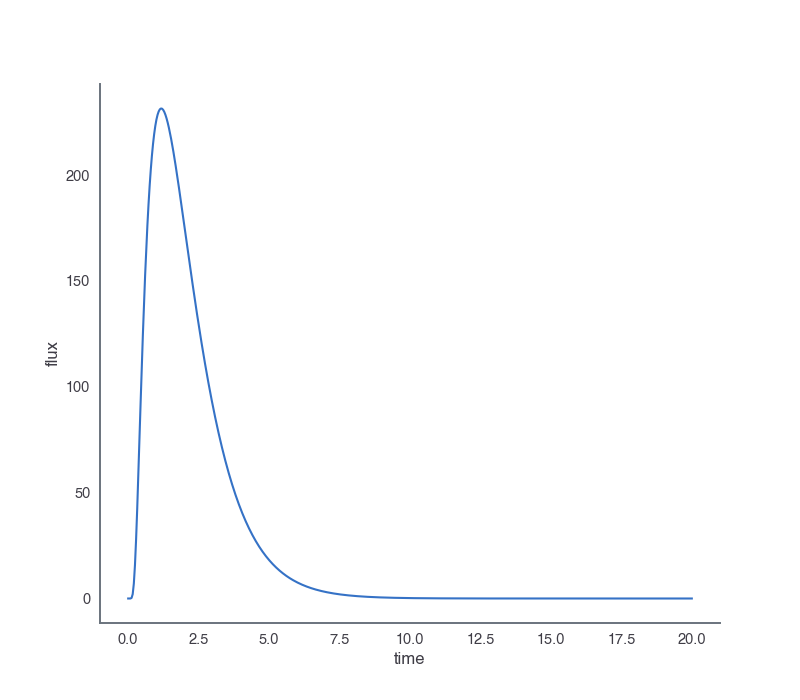

In [4]:
time = np.linspace(0, 20, 500)

grb.display_energy_integrated_light_curve(time);



<IPython.core.display.Javascript object>


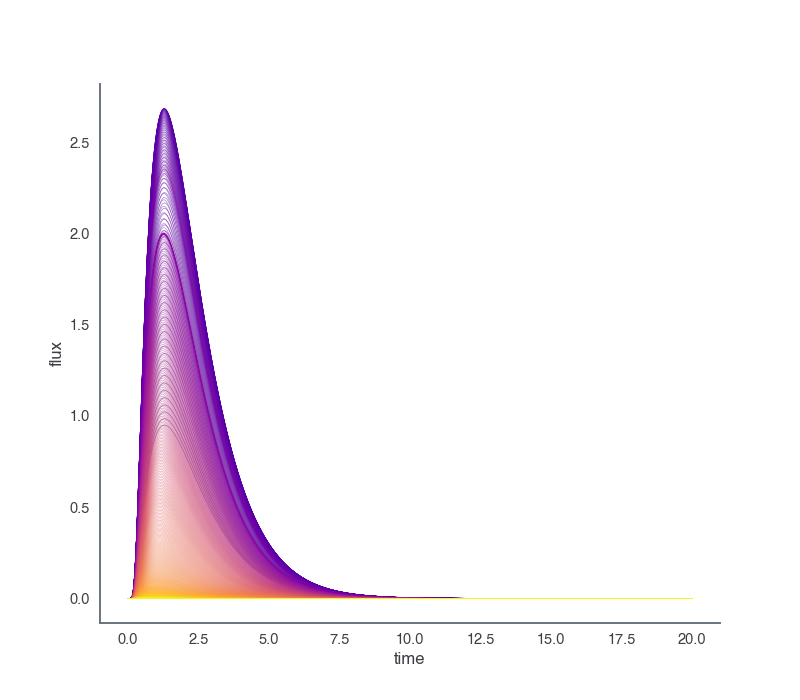

In [5]:
energy = np.logspace(1, 3, 500)

grb.display_energy_dependent_light_curve(time, energy, cmap='plasma', lw=.5, alpha=.5)

## Simulate the GRB 

In [6]:
grb.go(n_cores=6)

## Save the GRB to an HDF5 file

In [7]:
grb.save('test_grb.h5')

## Reload the GRB

In [8]:
grb_reload = cosmogrb.GRBSave.from_file('test_grb.h5')

<IPython.core.display.Javascript object>


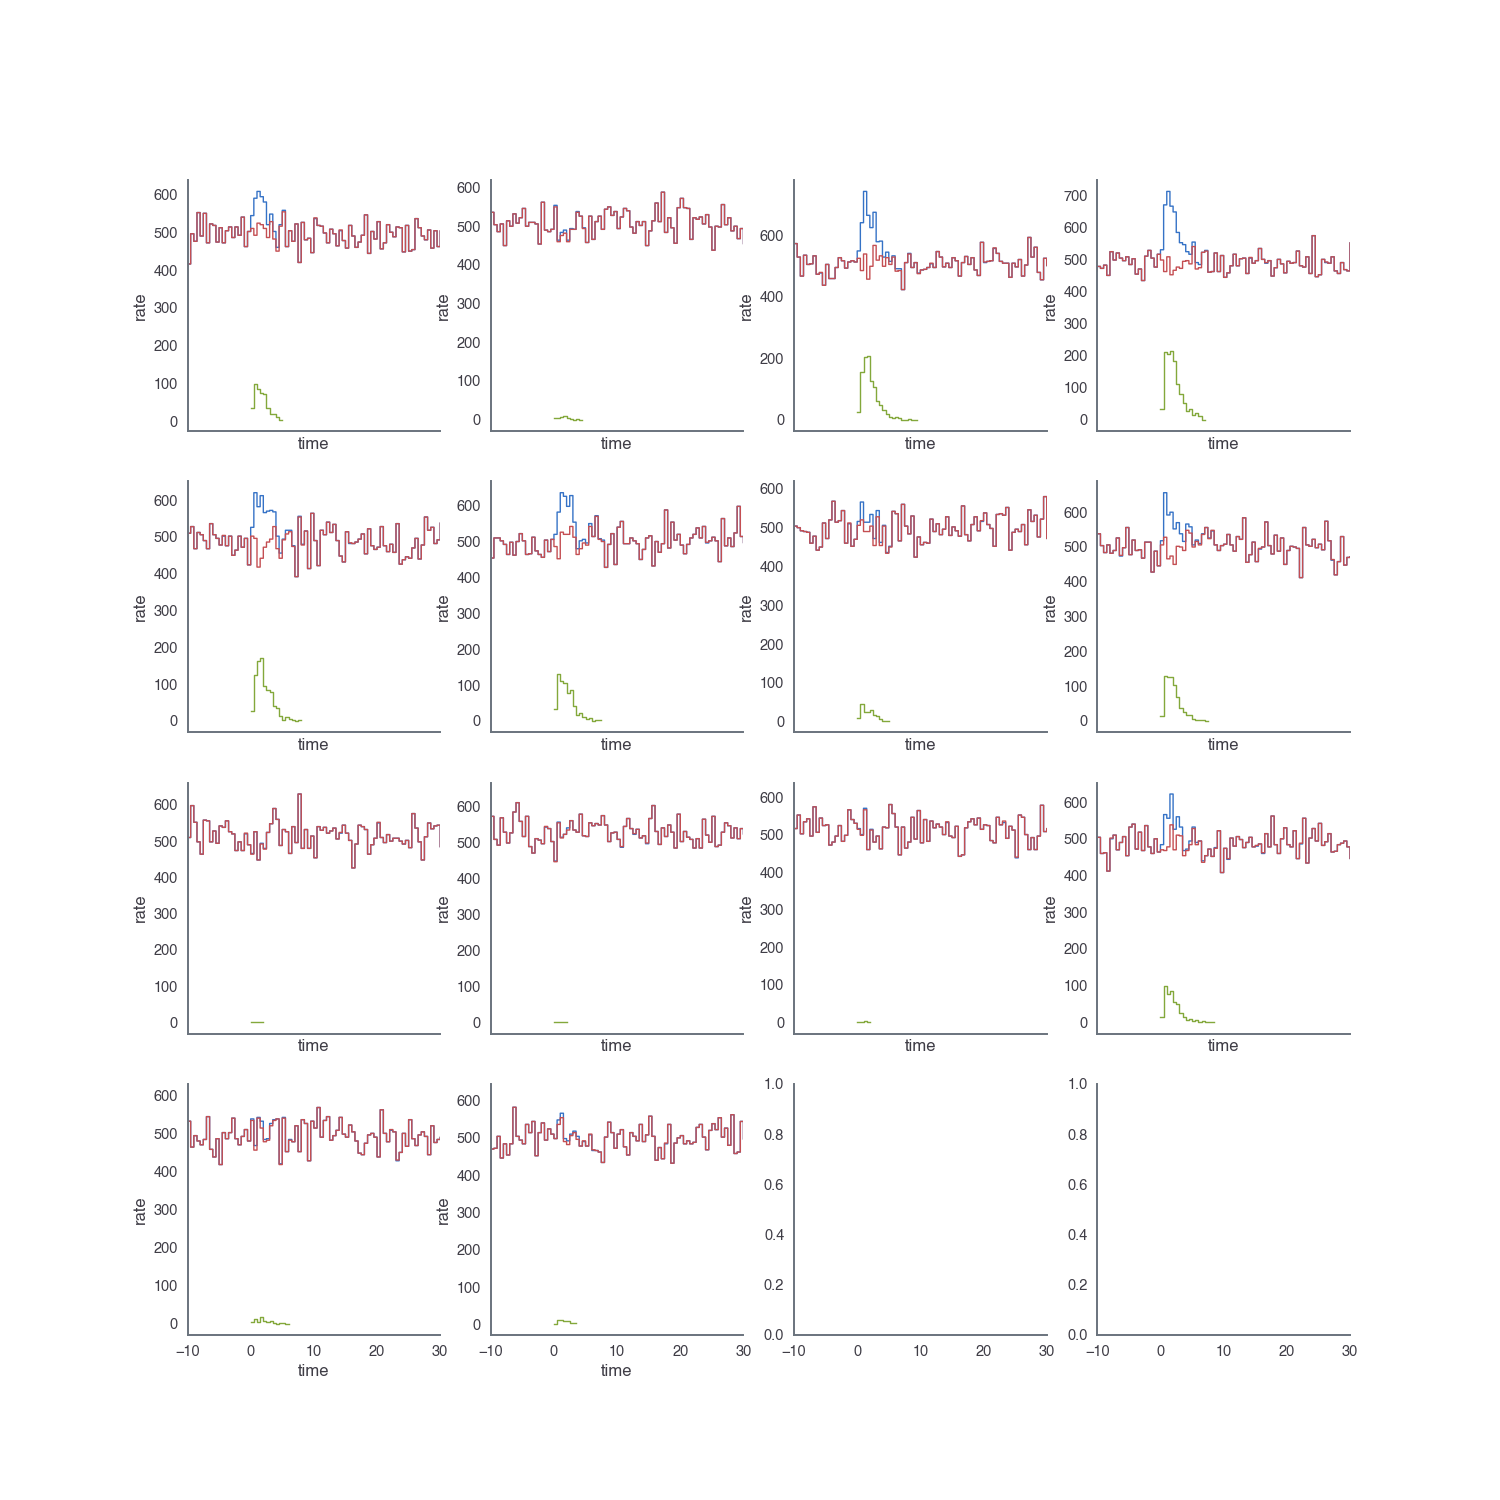

In [12]:
fig, axes = plt.subplots(4,4,sharex=True,sharey=False,figsize=(15,15))
row=0
col = 0
for key in grb_reload.keys:
    ax = axes[row][col]
    
    lightcurve = grb_reload[key]['lightcurve']
    
    lightcurve.display_lightcurve(dt=.5, ax=ax,lw=1)
    lightcurve.display_source(dt=.5,ax=ax,lw=1)
    lightcurve.display_background(dt=.5,ax=ax,lw=1)
    ax.set_xlim(-10, 30)
    
    if col < 3:
        col+=1
    else:
        row+=1
        col=0
    
    

<IPython.core.display.Javascript object>


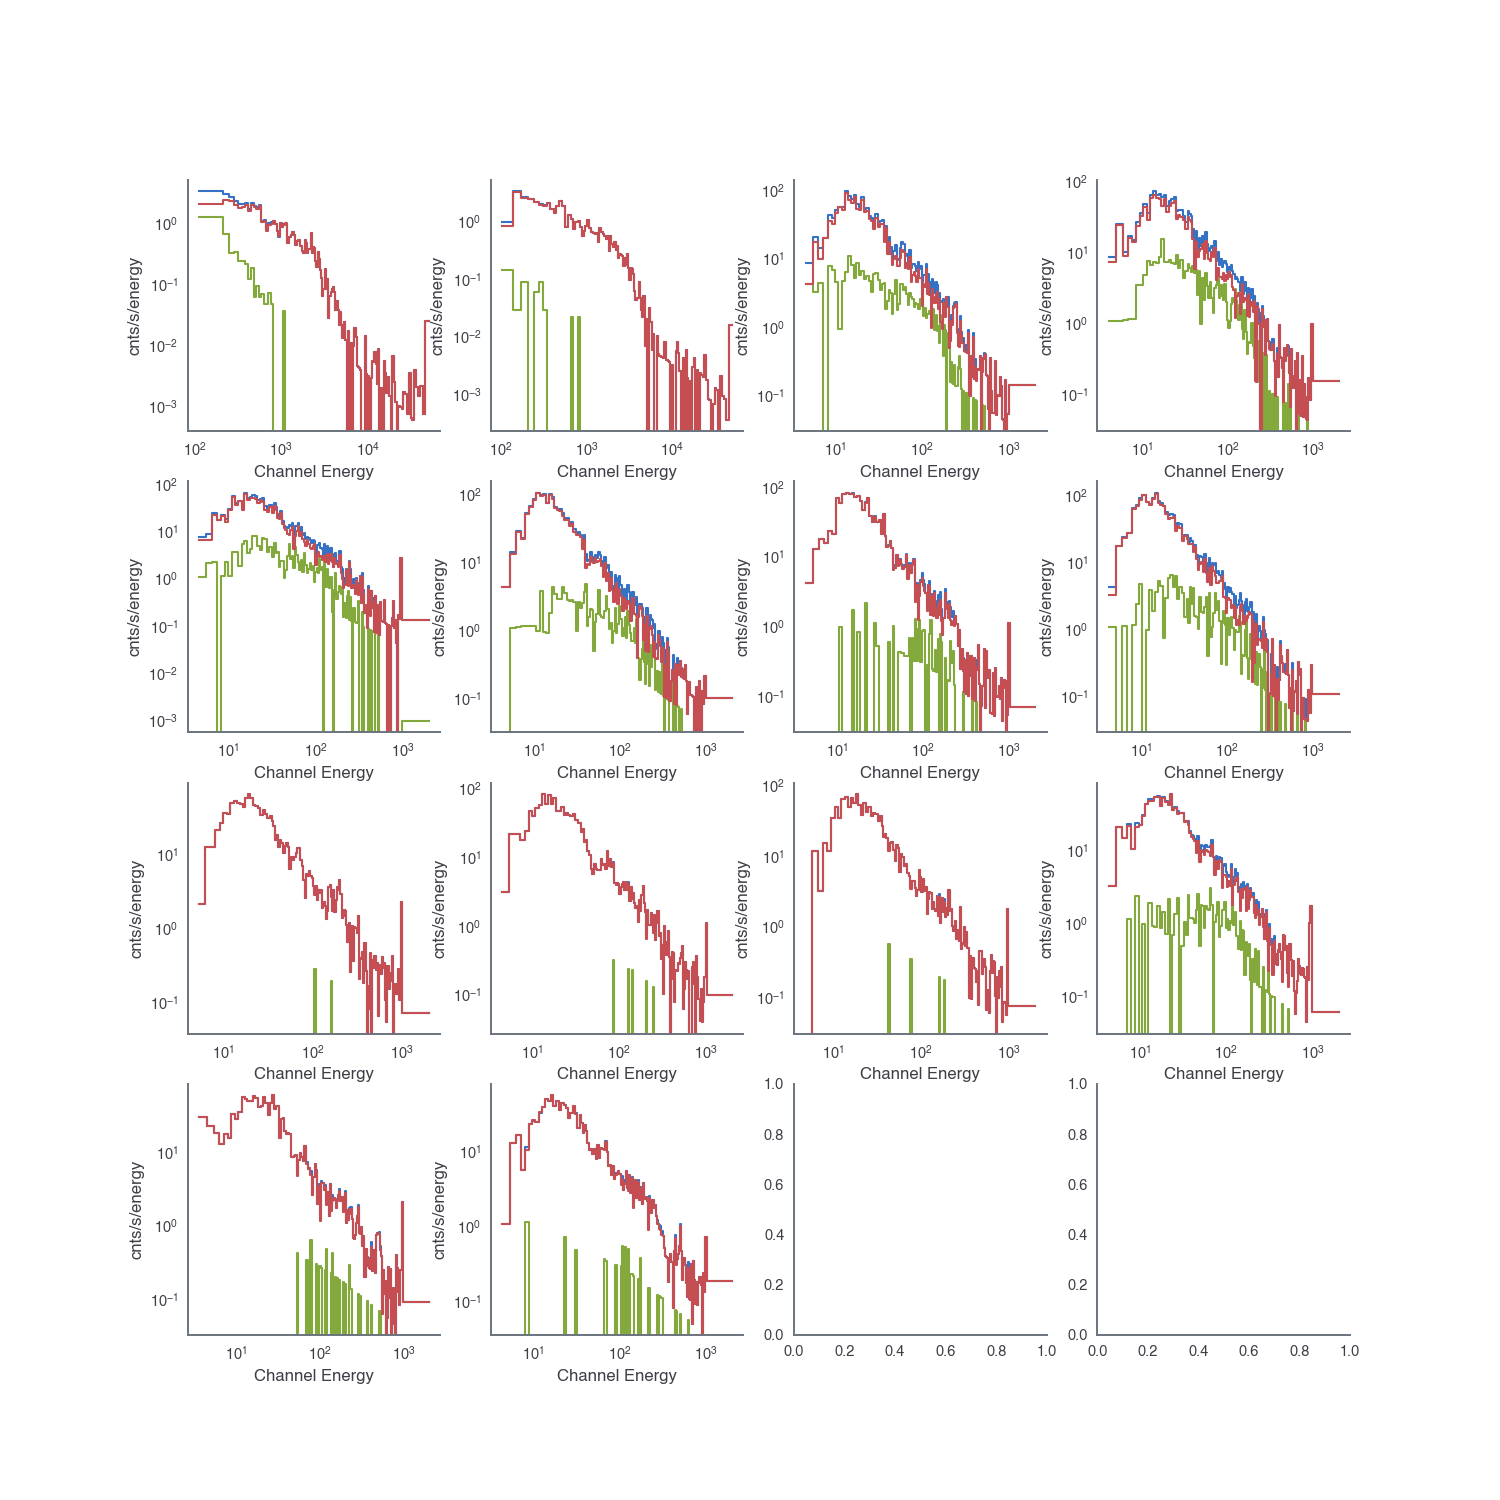

In [13]:
fig, axes = plt.subplots(4,4,sharex=False,sharey=False,figsize=(15,15))
row=0
col = 0

for key in grb_reload.keys:
    ax = axes[row][col]
    
    lightcurve = grb_reload[key]['lightcurve']
    
    lightcurve.display_count_spectrum(tmin=0, tmax=5, ax=ax)
    lightcurve.display_count_spectrum_source(tmin=0, tmax=5, ax=ax)
    lightcurve.display_count_spectrum_background(tmin=0, tmax=5, ax=ax)

    if col < 3:
        col+=1
    else:
        row+=1
        col=0

## Convert HDF5 to standard FITS files 

In [22]:
cosmogrb.grbsave_to_gbm_fits("test_grb.h5")
!ls SynthGRB_*

SynthGRB_b0.fits      SynthGRB_n3.fits      SynthGRB_n7rsp_n7.rsp
SynthGRB_b0.rsp       SynthGRB_n3.rsp       SynthGRB_n8.fits
SynthGRB_b0rsp_b0.rsp SynthGRB_n3rsp_n3.rsp SynthGRB_n8.rsp
SynthGRB_b1.rsp       SynthGRB_n4.fits      SynthGRB_n8rsp_n8.rsp
SynthGRB_b1rsp_b1.rsp SynthGRB_n4.rsp       SynthGRB_n9.fits
SynthGRB_n0.fits      SynthGRB_n4rsp_n4.rsp SynthGRB_n9.rsp
SynthGRB_n0.rsp       SynthGRB_n5.fits      SynthGRB_n9rsp_n9.rsp
SynthGRB_n0rsp_n0.rsp SynthGRB_n5.rsp       SynthGRB_na.fits
SynthGRB_n1.fits      SynthGRB_n5rsp_n5.rsp SynthGRB_na.rsp
SynthGRB_n1.rsp       SynthGRB_n6.fits      SynthGRB_narsp_na.rsp
SynthGRB_n1rsp_n1.rsp SynthGRB_n6.rsp       SynthGRB_nb.fits
SynthGRB_n2.fits      SynthGRB_n6rsp_n6.rsp SynthGRB_nb.rsp
SynthGRB_n2.rsp       SynthGRB_n7.fits      SynthGRB_nbrsp_nb.rsp
SynthGRB_n2rsp_n2.rsp SynthGRB_n7.rsp
